<a href="https://colab.research.google.com/github/artem-dorofeev/py_DataScience_HW/blob/main/HW11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Домашнє завдання**


*В якості домашнього завдання вам пропонується створити рекурентну нейронну мережу за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb.*


*На відміну від прикладу в модулі 9 ми використаємо рекурентну нейронну мережу. Поекспериментуйте з будовою мережі - RNN, LSTM, двостороння та глибока.*


*Порівняйте результати та зробіть висновки. *

*Я буду використовувати код з конспекту, місцями дещо змінювати, тому для себе, на майбутнє залишу коментування до коду*

**Проста модель RNN**

In [ ]:
# Встановити бібліотеки keras, tensorflow:

!pip install keras --upgrade tensorflow --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 61.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Succes

In [71]:
# Завантаження відкритих даних:

import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, GRU, LSTM, Bidirectional

from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout

*наступні 3 блоки: гіперпараметри, завантаження, предпроцесинг будут однакові для всіх НМ в цьому коді*

In [2]:
# Встановлюємо гіперпараметри:

max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32


In [72]:
# Завантаження даних:

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів


In [73]:
# Передпроцесинг послідовних даних:

input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів


In [8]:
# Побудова простої моделі RNN:

model_rnn_base = Sequential()
# Створення порожньої моделі Sequential

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model_rnn_base.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово

# Додавання SimpleRNN шару з 32 вузлами
model_rnn_base.add(SimpleRNN(32))
# Параметр: кількість вузлів (розмір прихованого стану)

# Додавання Dense шару з одним вузлом та активацією sigmoid
model_rnn_base.add(Dense(1, activation='sigmoid'))
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)


In [9]:
# Компіляція моделі:

model_rnn_base.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [10]:
# Виведення опису моделі:

model_rnn_base.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# Навчання моделі:

history_rnn = model_rnn_base.fit(input_train, y_train, epochs=5, batch_size=256, validation_split=0.3)
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини

test_loss_rnn_base, test_acc_rnn_base = model_rnn_base.evaluate(input_test, y_test)

print('Test Loss:', test_loss_rnn_base)
print('Test Accuracy:', test_acc_rnn_base)

Epoch 1/5
69/69 [==============================] - 17s 224ms/step - loss: 0.6564 - acc: 0.6052 - val_loss: 0.6047 - val_acc: 0.6543
Epoch 2/5
69/69 [==============================] - 22s 319ms/step - loss: 0.4550 - acc: 0.8041 - val_loss: 0.4332 - val_acc: 0.8177
Epoch 3/5
69/69 [==============================] - 16s 229ms/step - loss: 0.3627 - acc: 0.8511 - val_loss: 0.4031 - val_acc: 0.8235
Epoch 4/5
69/69 [==============================] - 18s 252ms/step - loss: 0.2948 - acc: 0.8814 - val_loss: 0.4264 - val_acc: 0.8116
Epoch 5/5
782/782 [==============================] - 26s 33ms/step - loss: 0.3778 - acc: 0.8458
Test Loss: 0.3777953088283539
Test Accuracy: 0.8457599878311157


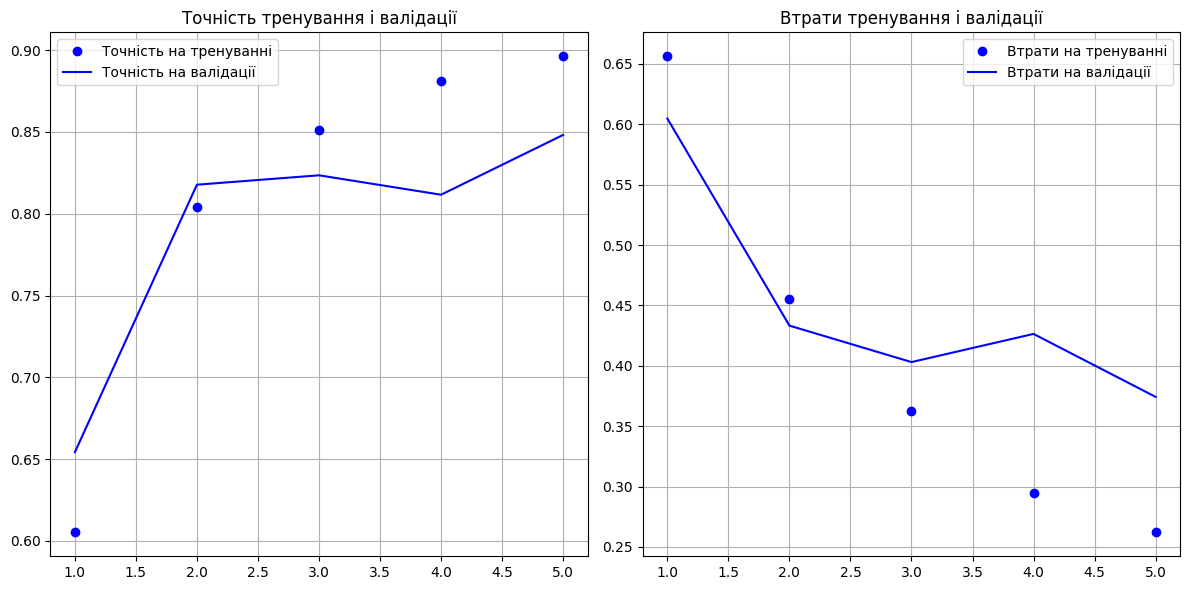

In [33]:
# Відображення результатів:

acc = history_rnn.history['acc']
val_acc = history_rnn.history['val_acc']
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.grid(True)
plt.legend()  # Показати легенду

# plt.figure()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.grid(True)
plt.legend()  # Показати легенду

plt.tight_layout()
plt.show()  # Відобразити графіки

In [13]:
# Прогнозування з використанням навченої моделі:

predictions = model_rnn_base.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss_rnn, test_acc_rnn = model_rnn_base.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss_rnn))
print('Test Accuracy: {}'.format(test_acc_rnn))

782/782 [==============================] - 18s 23ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 18s 23ms/step - loss: 0.3778 - acc: 0.8458
Test Loss: 0.3777953088283539
Test Accuracy: 0.8457599878311157


*Додаємо згорткові шари та Dropout:*

In [61]:
# Побудова моделі RNN з додаванням згорткових шарів та Dropout:

model_conv_drop = Sequential()
# Створення порожньої моделі Sequential

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model_conv_drop.add(Embedding(max_features, 32))

model_conv_drop.add(Conv1D(32, 5, activation='relu'))  # Згортковий шар
model_conv_drop.add(MaxPooling1D(3))  # Шар максимального згортання
model_conv_drop.add(Conv1D(32, 5, activation='relu'))  # Згортковий шар
model_conv_drop.add(GlobalMaxPooling1D())
model_conv_drop.add(Dense(32, activation='relu'))
model_conv_drop.add(Dropout(0.1))  # Dropout для регуляризації

# Додавання Dense шару з одним вузлом та активацією sigmoid
model_conv_drop.add(Dense(1, activation='sigmoid'))
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)

In [15]:
model_conv_drop.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history_model_conv_drop = model_conv_drop.fit(input_train, y_train, epochs=5, batch_size=256, validation_split=0.3)
test_loss_conv_drop, test_acc_conv_drop = model_conv_drop.evaluate(input_test, y_test)

print('Test Loss:', test_loss_conv_drop)
print('Test Accuracy:', test_acc_conv_drop)


Epoch 1/5
69/69 [==============================] - 18s 241ms/step - loss: 0.6919 - acc: 0.5247 - val_loss: 0.6861 - val_acc: 0.5509
Epoch 2/5
69/69 [==============================] - 16s 234ms/step - loss: 0.6013 - acc: 0.7127 - val_loss: 0.4862 - val_acc: 0.7657
Epoch 3/5
69/69 [==============================] - 16s 228ms/step - loss: 0.4069 - acc: 0.8208 - val_loss: 0.3820 - val_acc: 0.8359
Epoch 4/5
69/69 [==============================] - 18s 260ms/step - loss: 0.3131 - acc: 0.8701 - val_loss: 0.3758 - val_acc: 0.8389
Epoch 5/5
782/782 [==============================] - 6s 8ms/step - loss: 0.3389 - acc: 0.8534
Test Loss: 0.3388689458370209
Test Accuracy: 0.8533599972724915


In [16]:
model_conv_drop.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 conv1d (Conv1D)             (None, None, 32)          5152      
                                                                 
 max_pooling1d (MaxPooling1  (None, None, 32)          0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, None, 32)          5152      
                                                                 
 global_max_pooling1d (Glob  (None, 32)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_2 (Dense)             (None, 32)               

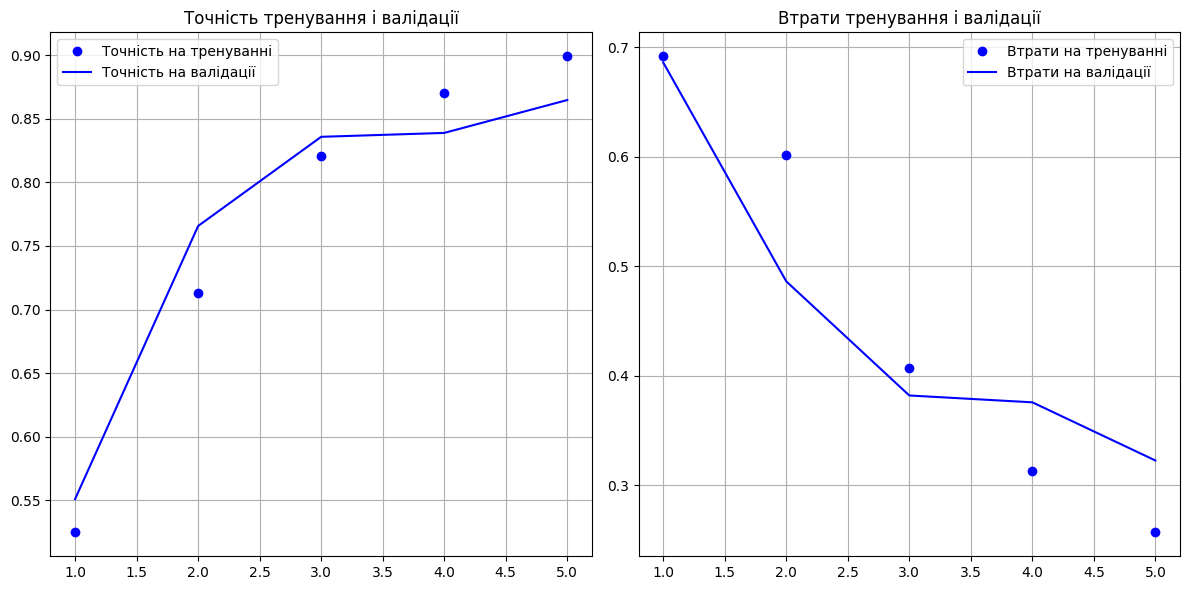

In [34]:
# Відображення результатів:

acc = history_model_conv_drop.history['acc']
val_acc = history_model_conv_drop.history['val_acc']
loss = history_model_conv_drop.history['loss']
val_loss = history_model_conv_drop.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.grid(True)
plt.legend()  # Показати легенду

# plt.figure()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.grid(True)
plt.legend()  # Показати легенду

plt.tight_layout()  # Автоматично налаштує розміщення графіків
plt.show()  # Відобразити графіки


In [18]:
# Прогнозування з використанням навченої моделі:

predictions = model_conv_drop.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model_conv_drop.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 7s 9ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 7s 8ms/step - loss: 0.3389 - acc: 0.8534
Test Loss: 0.3388689458370209
Test Accuracy: 0.8533599972724915


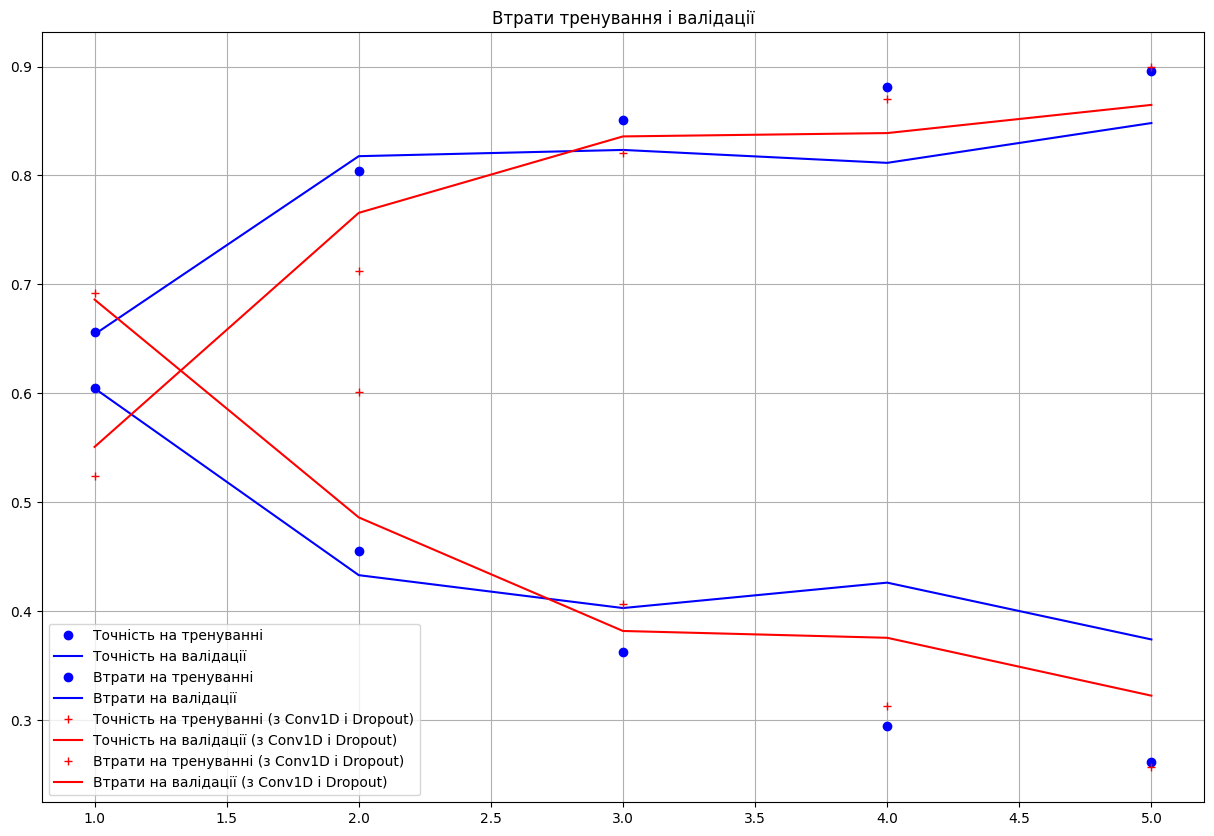

In [19]:
# Відображення результатів першої моделі

plt.figure(figsize=(15, 10))

acc = history_rnn.history['acc']
val_acc = history_rnn.history['val_acc']
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.grid(True)
plt.legend()  # Показати легенду

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.grid(True)
plt.legend()  # Показати легенду

# Відображення результатів другої моделі
acc = history_model_conv_drop.history['acc']
val_acc = history_model_conv_drop.history['val_acc']
loss = history_model_conv_drop.history['loss']
val_loss = history_model_conv_drop.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r+', label='Точність на тренуванні (з Conv1D і Dropout)')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'r', label='Точність на валідації (з Conv1D і Dropout)')  # Графік точності на валідаційних данних
plt.plot(epochs, loss, 'r+', label='Втрати на тренуванні (з Conv1D і Dropout)')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'r', label='Втрати на валідації (з Conv1D і Dropout)')  # Графік втрат на валідаційних данних
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки


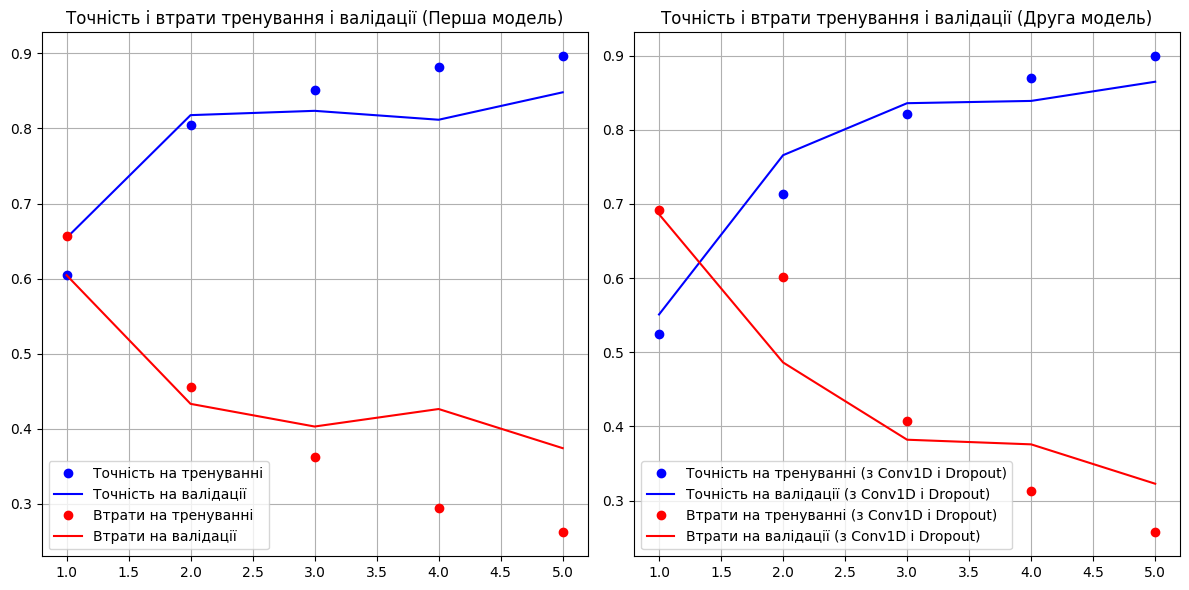

In [21]:
# Відображення результатів обох моделей
plt.figure(figsize=(12, 6))  # Задаємо розмір фігури

# Відображення результатів першої моделі
plt.subplot(1, 2, 1)

acc = history_rnn.history['acc']
val_acc = history_rnn.history['val_acc']
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.plot(epochs, loss, 'ro', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'r', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Точність і втрати тренування і валідації (Перша модель)')  # Заголовок графіку
plt.grid(True)
plt.legend()  # Показати легенду

# Відображення результатів другої моделі
plt.subplot(1, 2, 2)

acc = history_model_conv_drop.history['acc']
val_acc = history_model_conv_drop.history['val_acc']
loss = history_model_conv_drop.history['loss']
val_loss = history_model_conv_drop.history['val_loss']

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні (з Conv1D і Dropout)')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації (з Conv1D і Dropout)')  # Графік точності на валідаційних данних
plt.plot(epochs, loss, 'ro', label='Втрати на тренуванні (з Conv1D і Dropout)')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'r', label='Втрати на валідації (з Conv1D і Dropout)')  # Графік втрат на валідаційних данних
plt.title('Точність і втрати тренування і валідації (Друга модель)')  # Заголовок графіку
plt.grid(True)
plt.legend()  # Показати легенду

plt.tight_layout()  # Автоматично налаштує розміщення графіків
plt.show()  # Відобразити графіки



In [22]:
import os

glove_path = '/content/data/glove.6B.50d.txt'
# glove_path = '/content/data'


if os.path.exists(glove_path):
    print("Файл існує.")
else:
    print("Файл не знайдено.")

Файл існує.


In [23]:
import os

relative_path = '/content/data/glove.6B.50d.txt'
absolute_path = os.path.abspath(relative_path)

print("Relative Path:", relative_path)
print("Absolute Path:", absolute_path)


Relative Path: /content/data/glove.6B.50d.txt
Absolute Path: /content/data/glove.6B.50d.txt


*Для вирішення проблеми затухання та вибухання градієнту в RNN використовуються моделі з покращеними механізмами, такі як GRU та LSTM. Ці моделі дозволяють краще контролювати потік градієнтів і зберігати корисну інформацію про довготривалі залежності в послідовностях.*

**GRU**

In [26]:
# Побудова моделі GRU:

model_gru = Sequential()
# Створення порожньої моделі Sequential

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model_gru.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово
model_gru.add(Dropout(0.1))  # Додавання Dropout після Embedding

# Додавання GRU шару з 32 вузлами
model_gru.add(GRU(32))
# Параметр: кількість вузлів (розмір прихованого стану)
model_gru.add(Dropout(0.1))  # Додавання Dropout після GRU


# Додавання Dense шару з одним вузлом та активацією sigmoid
model_gru.add(Dense(1, activation='sigmoid'))
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)

*в код додан Dropout, я пробував без/з Dropuot, з різними параметрами, більш сподобалось в такій модифікації*

In [27]:
# Компіляція моделі:

model_gru.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [28]:
# Виведення опису моделі:

model_gru.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 dropout_1 (Dropout)         (None, None, 32)          0         
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 326369 (1.24 MB)
Trainable params: 326369 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# Навчання моделі:

history_model_gru = model_gru.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини

test_loss_gru, test_acc_gru = model_gru.evaluate(input_test, y_test)

print('Test Loss:', test_loss_gru)
print('Test Accuracy:', test_acc_gru)

Epoch 1/5
137/137 [==============================] - 51s 323ms/step - loss: 0.6639 - acc: 0.5942 - val_loss: 0.7029 - val_acc: 0.6623
Epoch 2/5
137/137 [==============================] - 44s 319ms/step - loss: 0.4099 - acc: 0.8156 - val_loss: 0.3621 - val_acc: 0.8389
Epoch 3/5
137/137 [==============================] - 43s 313ms/step - loss: 0.3062 - acc: 0.8730 - val_loss: 0.3265 - val_acc: 0.8652
Epoch 4/5
137/137 [==============================] - 43s 316ms/step - loss: 0.2541 - acc: 0.9022 - val_loss: 0.3218 - val_acc: 0.8675
Epoch 5/5
782/782 [==============================] - 30s 38ms/step - loss: 0.3322 - acc: 0.8662
Test Loss: 0.33222174644470215
Test Accuracy: 0.8661999702453613


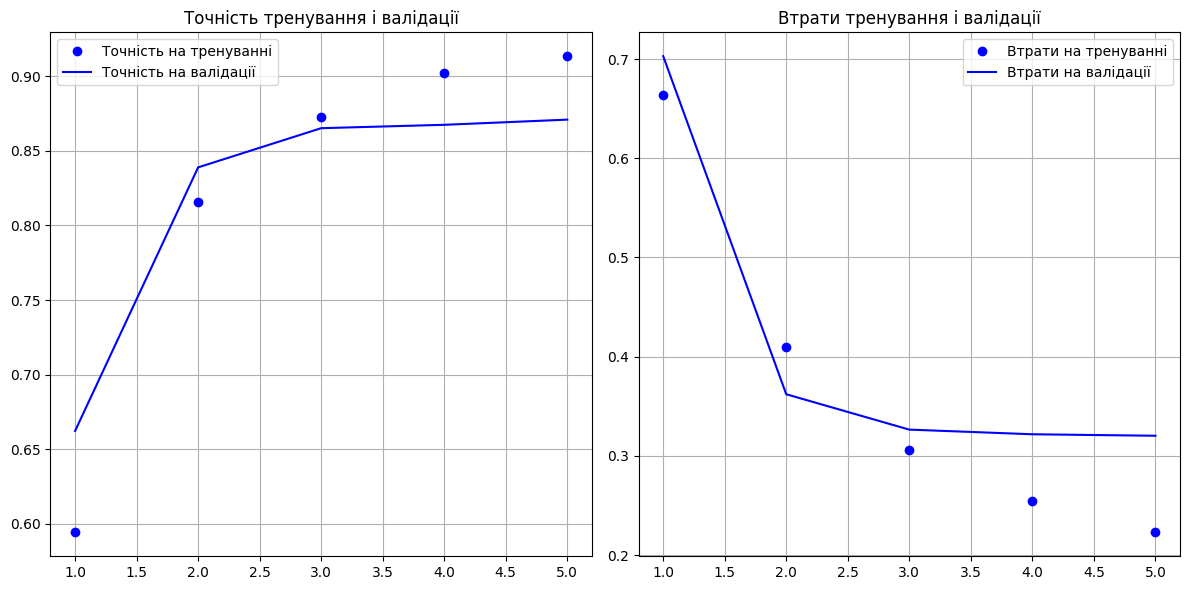

In [35]:
# Відображення результатів:

acc = history_model_gru.history['acc']
val_acc = history_model_gru.history['val_acc']
loss = history_model_gru.history['loss']
val_loss = history_model_gru.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.grid(True)
plt.legend()  # Показати легенду

# plt.figure()
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.grid(True)
plt.legend()  # Показати легенду

plt.tight_layout() # Розміщення графіків без перекриття
plt.show()  # Відобразити графіки


In [31]:
# Прогнозування з використанням навченої моделі:

predictions_gru = model_gru.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions_gru = [1 if pred > 0.5 else 0 for pred in predictions_gru]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions_gru[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss_gru, test_acc_gru = model_gru.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss_gru))
print('Test Accuracy: {}'.format(test_acc_gru))


782/782 [==============================] - 32s 40ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 28s 36ms/step - loss: 0.3322 - acc: 0.8662
Test Loss: 0.33222174644470215
Test Accuracy: 0.8661999702453613


**LSTM**

In [38]:
# Побудова моделі LSTM:

model_lstm = Sequential()
# Створення порожньої моделі Sequential

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model_lstm.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово
model_lstm.add(Dropout(0.2))  # Додавання Dropout після Embedding

# Додавання LSTM шару з 32 вузлами
model_lstm.add(LSTM(32))
# Параметр: кількість вузлів (розмір прихованого стану)
model_lstm.add(Dropout(0.2))  # Додавання Dropout після LSTM

# Додавання Dense шару з одним вузлом та активацією sigmoid
model_lstm.add(Dense(1, activation='sigmoid'))
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)


In [39]:
# Компіляція моделі:

model_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [40]:
# Виведення опису моделі:

model_lstm.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          320000    
                                                                 
 dropout_4 (Dropout)         (None, None, 32)          0         
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
# Навчання моделі:

history_lstm = model_lstm.fit(input_train, y_train, epochs=4, batch_size=128, validation_split=0.3)
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss_lstm, test_acc_lstm = model_lstm.evaluate(input_test, y_test)

print('Test Loss:', test_loss_lstm)
print('Test Accuracy:', test_acc_lstm)

Epoch 1/4
137/137 [==============================] - 48s 331ms/step - loss: 0.6372 - acc: 0.6308 - val_loss: 0.4774 - val_acc: 0.8149
Epoch 2/4
137/137 [==============================] - 44s 324ms/step - loss: 0.4065 - acc: 0.8322 - val_loss: 0.3467 - val_acc: 0.8559
Epoch 3/4
137/137 [==============================] - 46s 336ms/step - loss: 0.3087 - acc: 0.8761 - val_loss: 0.3176 - val_acc: 0.8735
Epoch 4/4
782/782 [==============================] - 31s 40ms/step - loss: 0.3219 - acc: 0.8635
Test Loss: 0.32191789150238037
Test Accuracy: 0.8635200262069702


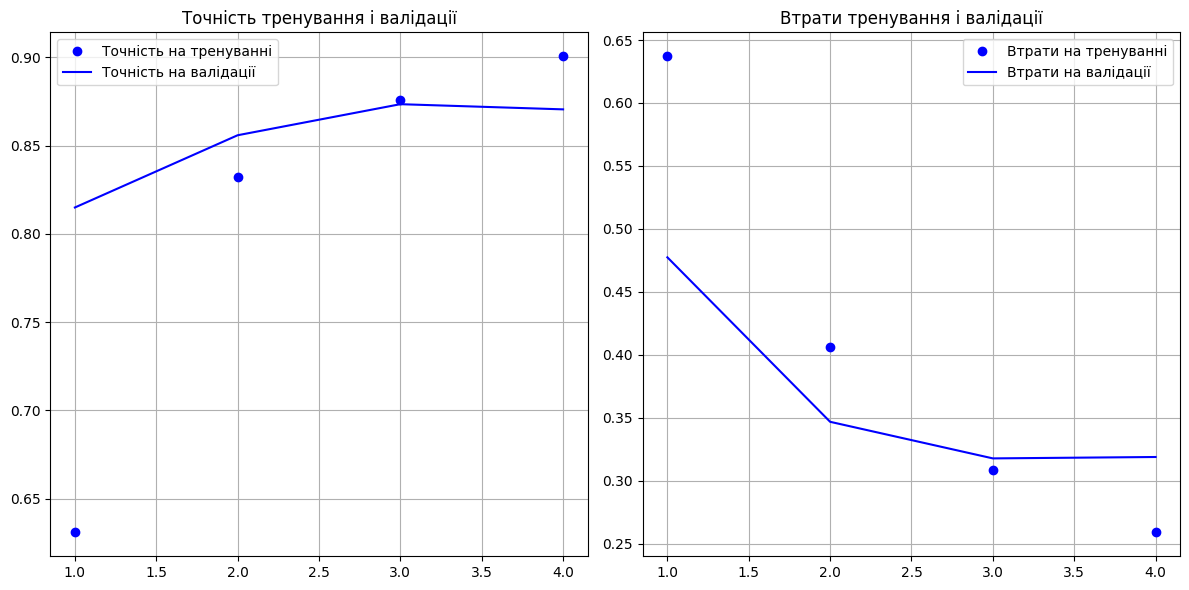

In [42]:
# Відображення результатів:

acc = history_lstm.history['acc']
val_acc = history_lstm.history['val_acc']
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.grid(True)
plt.legend()

# plt.figure()
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.grid(True)
plt.legend()

plt.tight_layout() # Розміщення графіків без перекриття
plt.show()  # Відобразити графіки


In [43]:
# Прогнозування з використанням навченої моделі:

predictions_lstm = model_lstm.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions_lstm = [1 if pred > 0.5 else 0 for pred in predictions_lstm]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions_lstm[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
# test_loss_lstm, test_acc_lstm = model_lstm.evaluate(input_test, y_test)
# print('Test Loss: {}'.format(test_loss_lstm))
# print('Test Accuracy: {}'.format(test_acc_lstm))


782/782 [==============================] - 35s 44ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1


**BRNN**

*​Походження BRNN пов'язане з обмеженнями, що є в оригінальних рекурентних нейронних мережах (RNN). Стандартні RNN розроблені для запам'ятовування минулих даних і дозволяють цій інформації впливати на майбутні прогнози, але вони обробляють інформацію тільки в прямому напрямку. Іншими словами, RNN чудово використовують інформацію з минулого, щоб повідомляти про майбутнє, але що, якщо майбутнє також могло б повідомляти про минуле? Це прогалина, яку BRNN мають на меті заповнити.*

In [46]:
# побува моделі LSTM з додаванням Bidirectional

model_brnn = Sequential()
# Створення порожньої моделі Sequential

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model_brnn.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово

# Додавання Bidirectional LSTM шару з 32 вузлами
model_brnn.add(Bidirectional(LSTM(32)))
# Параметр: кількість вузлів (розмір прихованого стану)

# Додавання Dense шару з одним вузлом та активацією sigmoid
model_brnn.add(Dense(1, activation='sigmoid'))
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)


In [47]:
# компіляція моделі

model_brnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model_brnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 336705 (1.28 MB)
Trainable params: 336705 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
# навчання моделі:

history_brnn = model_brnn.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини

test_loss_brnn, test_acc_brnn = model_brnn.evaluate(input_test, y_test)

print('Test Loss:', test_loss_brnn)
print('Test Accuracy:', test_acc_brnn)

Epoch 1/5
137/137 [==============================] - 102s 711ms/step - loss: 0.6510 - acc: 0.6049 - val_loss: 0.4868 - val_acc: 0.7908
Epoch 2/5
137/137 [==============================] - 117s 857ms/step - loss: 0.4141 - acc: 0.8253 - val_loss: 0.3254 - val_acc: 0.8673
Epoch 3/5
137/137 [==============================] - 98s 719ms/step - loss: 0.2950 - acc: 0.8852 - val_loss: 0.3181 - val_acc: 0.8675
Epoch 4/5
137/137 [==============================] - 75s 551ms/step - loss: 0.2460 - acc: 0.9070 - val_loss: 0.3401 - val_acc: 0.8556
Epoch 5/5
782/782 [==============================] - 60s 77ms/step - loss: 0.4339 - acc: 0.8254
Test Loss: 0.43394526839256287
Test Accuracy: 0.8253600001335144


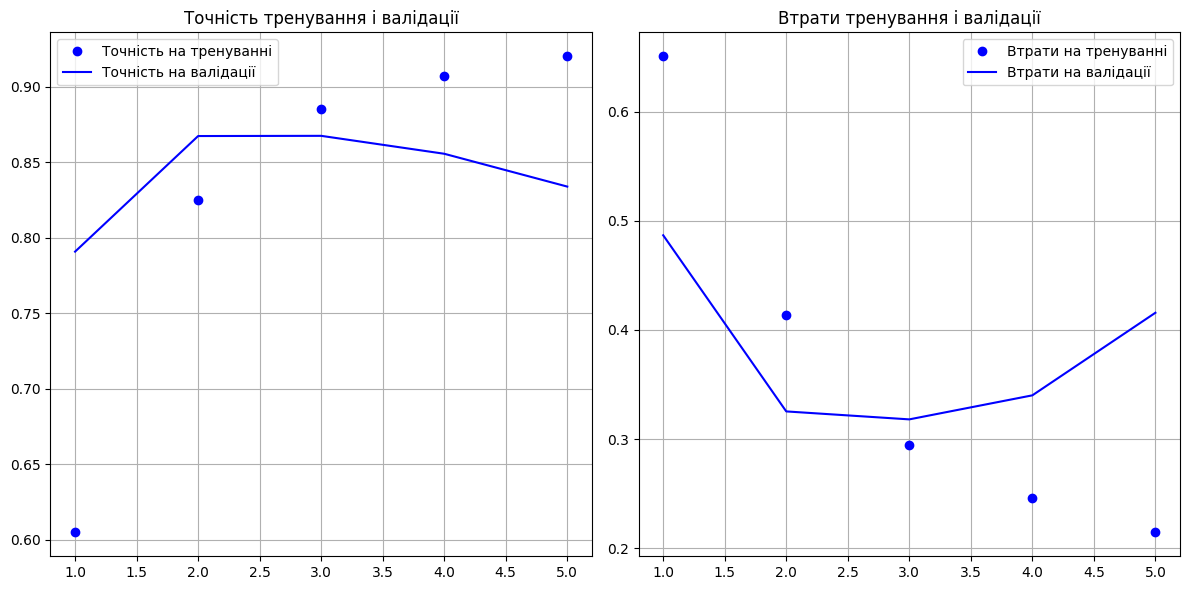

In [56]:
acc = history_brnn.history['acc']
val_acc = history_brnn.history['val_acc']
loss = history_brnn.history['loss']
val_loss = history_brnn.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.grid(True)
plt.legend()

# plt.figure()
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.grid(True)
plt.legend()

plt.tight_layout() # Розміщення графіків без перекриття
plt.show()  # Відобразити графіки

In [50]:
predictions = model_brnn.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss_brnn, test_acc_brnn = model_brnn.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss_brnn))
print('Test Accuracy: {}'.format(test_acc_brnn))


782/782 [==============================] - 55s 69ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 52s 66ms/step - loss: 0.4339 - acc: 0.8254
Test Loss: 0.43394526839256287
Test Accuracy: 0.8253600001335144


**DRNN**

*Deep RNN були введені, щоб долати деякі обмеження традиційних RNN. Хоча звичайні RNN є потужними, іноді вони можуть виявитися недостатніми для виявлення складних шаблонів або залежностей у даних на довгій відстані. Deep RNN вирішують цю проблему, додаючи до мережі більше шарів, роблячи її "глибше". Це дозволяє мережі вчити більш складні функції та залежності, що потенційно може покращити продуктивність у завданнях, де ці фактори мають значення.*

In [51]:
# побудова моделі:

model_drnn = Sequential()
# Створення порожньої моделі Sequential

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model_drnn.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово

# Додавання декількох Bidirectional LSTM шару з 32 вузлами
model_drnn.add(Bidirectional(LSTM(32, return_sequences=True)))
model_drnn.add(Bidirectional(LSTM(32)))
# Параметр: кількість вузлів (розмір прихованого стану) і return_sequences=True для першого шару, щоб надати послідовність як вхід на наступний шар

# Додавання Dense шару з одним вузлом та активацією sigmoid
model_drnn.add(Dense(1, activation='sigmoid'))
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)


In [52]:
model_drnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model_drnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional_1 (Bidirecti  (None, None, 64)          16640     
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 361537 (1.38 MB)
Trainable params: 361537 (1.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
# навчання моделі:

history_drnn = model_drnn.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини

test_loss_drnn, test_acc_drnn = model_drnn.evaluate(input_test, y_test)

print('Test Loss:', test_loss_drnn)
print('Test Accuracy:', test_acc_drnn)

Epoch 1/5
137/137 [==============================] - 180s 1s/step - loss: 0.6179 - acc: 0.6252 - val_loss: 0.4050 - val_acc: 0.8264
Epoch 2/5
137/137 [==============================] - 170s 1s/step - loss: 0.3592 - acc: 0.8483 - val_loss: 0.3020 - val_acc: 0.8787
Epoch 3/5
137/137 [==============================] - 172s 1s/step - loss: 0.2721 - acc: 0.8937 - val_loss: 0.3761 - val_acc: 0.8348
Epoch 4/5
137/137 [==============================] - 173s 1s/step - loss: 0.2179 - acc: 0.9201 - val_loss: 0.2941 - val_acc: 0.8844
Epoch 5/5
782/782 [==============================] - 108s 138ms/step - loss: 0.4359 - acc: 0.8479
Test Loss: 0.4359254240989685
Test Accuracy: 0.8478800058364868


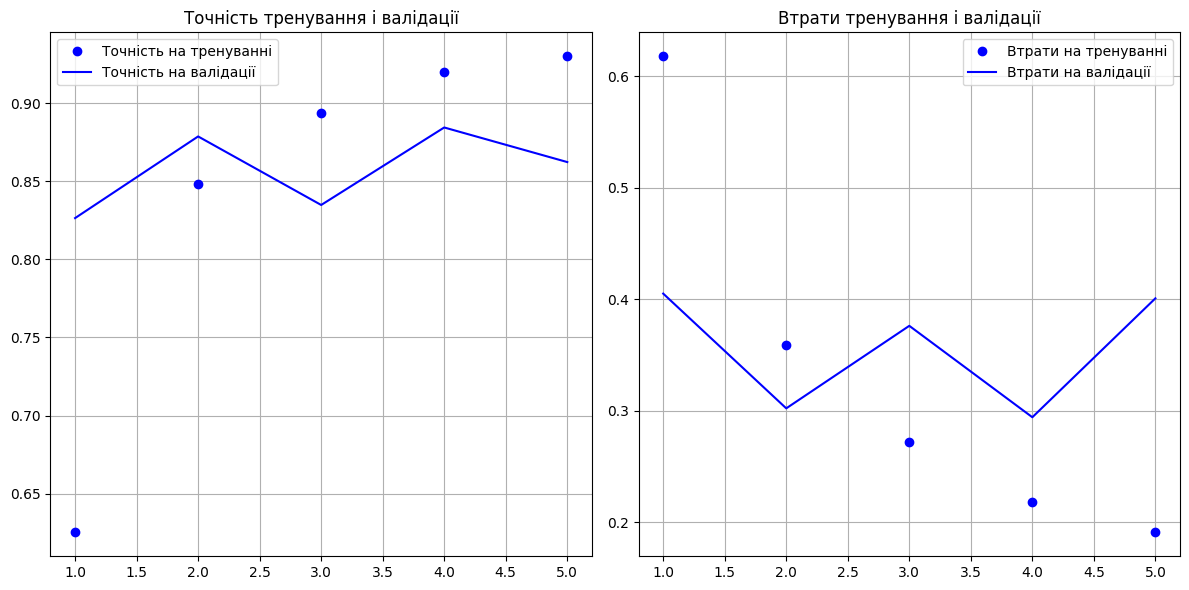

In [57]:
acc = history_drnn.history['acc']
val_acc = history_drnn.history['val_acc']
loss = history_drnn.history['loss']
val_loss = history_drnn.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.grid(True)
plt.legend()

# plt.figure()
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.grid(True)
plt.legend()

plt.tight_layout() # Розміщення графіків без перекриття
plt.show()  # Відобразити графіки
